In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from  matplotlib.ticker import FuncFormatter
import math


### Reading Sepsis data

In [ ]:
data = pd.read_csv('Datasets/Sepsis Cases - Event Log.csv')
data.shape

### Getting Release Type of every case

In [ ]:
rel = data[['Case ID', 'Activity']]
release = rel[rel['Activity'].str.contains('Release')]

### Counting number of activities

In [ ]:
count_events = data[['Case ID','Activity','Leucocytes', 'CRP', 'LacticAcid']]
count_events_and_tests= count_events.groupby('Case ID')[['Activity','Leucocytes', 'CRP', 'LacticAcid']].count()
count_events_and_tests.head()


In [ ]:
count_events_and_tests.shape

### Dropping non important features.

In [ ]:
data = data.drop(['Activity', 'Complete Timestamp', 'Variant', 'Variant index',
    'lifecycle:transition', 'org:group'], axis=1)
data.head(20)

### Dropping rows with NAN values i.e. keeping 1 row for each case

In [ ]:
sep=data.dropna(thresh=15)
sep.reset_index(drop=True, inplace=True)
sep.shape

In [ ]:
len(data.Diagnose.unique())

In [ ]:
count_events_and_tests =count_events_and_tests.reset_index()

In [ ]:
# Renaming Column names of dataframe of Counts
count_events_and_tests.rename(columns={'Activity': 'Activity_count', 'Leucocytes': 'Leucocytes_count','CRP':'CRP_count','LacticAcid':'LacticAcid_count'}, inplace=True)
release.rename(columns={'Activity': 'Release_type'}, inplace=True)

### Dropping Tests from sepsis dataset

In [ ]:
sep = sep.drop(['Leucocytes', 'CRP', 'LacticAcid'], axis=1)
sep.head()

### Merging All dataframes to constitute table with additional columns i.e. Count of activities and Tests conducted

In [ ]:
mer =pd.merge(count_events_and_tests, release, on='Case ID', how='outer')
mer.shape

In [ ]:
processed_data_unfiltered = pd.merge(sep, mer, on='Case ID', how='outer')
processed_data_unfiltered.head(10)

In [ ]:
processed_data_unfiltered.shape

In [ ]:
processed_data_unfiltered.columns

In [ ]:
processed_data_unfiltered.to_csv('Datasets/processed_data_unfiltered.csv')

In [ ]:


# Importing a XES event log
from pm4py.objects.log.importer.xes import importer as xes_importer
log = xes_importer.apply('Datasets/Sepsis Cases - Event Log.xes.gz')
#log[1],type(log)

### Extracting total Activities

In [ ]:
from pm4py.algo.filtering.log.attributes import attributes_filter
activities = attributes_filter.get_attribute_values(log, "concept:name")
resources = attributes_filter.get_attribute_values(log, "org:resource")
activities

In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

In [ ]:
keys = list(activities.keys())
vals = [float(activities[k]) for k in keys]
ax = sns.barplot(x=keys, y=vals)
addlabels(keys, vals)
ax.set(xlabel='Activities', ylabel='Count',title='Activity Frequency')
plt.show()

In [ ]:
processed_data_unfiltered.Activity_count.value_counts()

In [ ]:
type(processed_data_unfiltered.Activity_count.value_counts())

In [ ]:
processed_data_unfiltered.Activity_count.value_counts().plot.bar(rot=90)

In [ ]:
df = processed_data_unfiltered[['InfectionSuspected', 'DiagnosticBlood', 'DisfuncOrg',
       'SIRSCritTachypnea', 'Hypotensie', 'SIRSCritHeartRate', 'Infusion']]
df1 = df.melt(var_name='Tests', value_name='Test Conducted')
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(x='Tests', hue='Test Conducted', data=df1)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
df = processed_data_unfiltered[['DiagnosticIC', 'DiagnosticSputum',
       'DiagnosticLiquor', 'DiagnosticOther', 'SIRSCriteria2OrMore',
       'DiagnosticXthorax', 'SIRSCritTemperature', 'DiagnosticUrinaryCulture']]
df1 = df.melt(var_name='Tests', value_name='Test Conducted')
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(x='Tests', hue='Test Conducted', data=df1)
for container in ax.containers:
    ax.bar_label(container)
plt.show()




In [ ]:
df = processed_data_unfiltered[['SIRSCritLeucos', 'Oligurie', 'DiagnosticLacticAcid','DiagnosticArtAstrup','Hypoxie', 'DiagnosticUrinarySediment', 'DiagnosticECG']]
df1 = df.melt(var_name='Tests', value_name='Test Conducted')
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(x='Tests', hue='Test Conducted', data=df1)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

       

# Filtered data 

Removed incomplete Traces 

- 1050 cases. 
- Filtered incomplete traces.  ( With no release/return Activity)
- 776 left

In [2]:


# Importing a XES event log
from pm4py.objects.log.importer.xes import importer as xes_importer
log = xes_importer.apply('Datasets/Sepsis Cases - Event Log-Filtered.xes')
#log[1],type(log)

parsing log, completed traces :: 100%|██████████| 777/777 [00:01<00:00, 413.46it/s]


### Extracting total Activities

In [3]:
from pm4py.algo.filtering.log.attributes import attributes_filter
activities = attributes_filter.get_attribute_values(log, "concept:name")
resources = attributes_filter.get_attribute_values(log, "org:resource")
activities

{'ER Registration': 777,
 'Leucocytes': 3095,
 'CRP': 2984,
 'LacticAcid': 1292,
 'ER Triage': 778,
 'ER Sepsis Triage': 776,
 'IV Liquid': 620,
 'IV Antibiotics': 677,
 'Admission NC': 1152,
 'Release A': 667,
 'Return ER': 291,
 'Admission IC': 114,
 'Release B': 55,
 'Release C': 25,
 'Release D': 24,
 'Release E': 6}

In [4]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

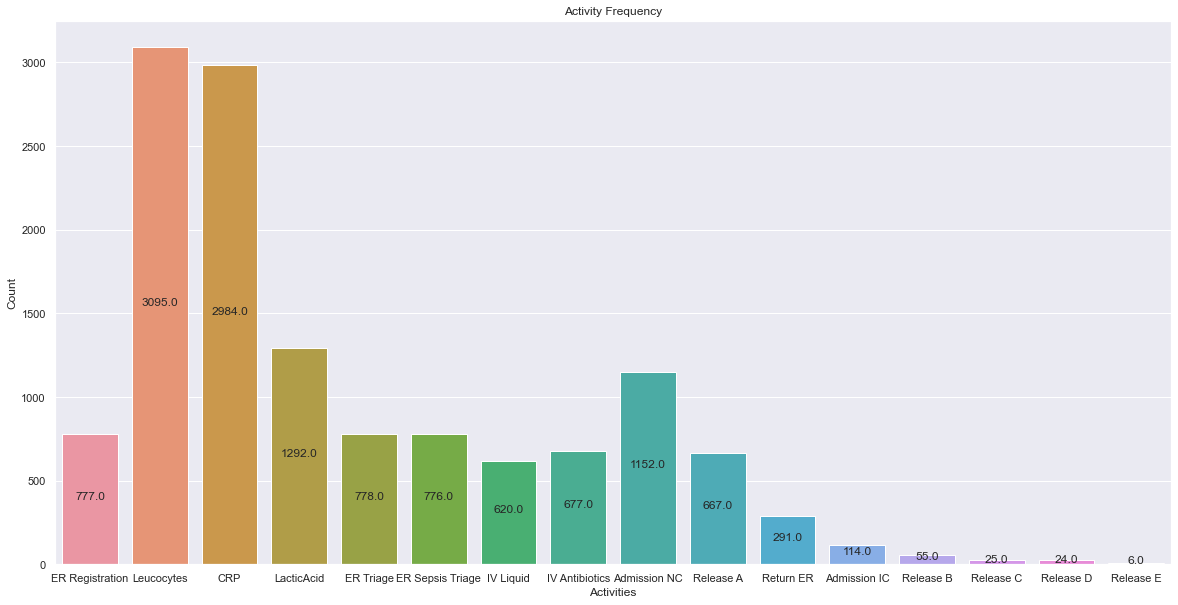

In [5]:
keys = list(activities.keys())
vals = [float(activities[k]) for k in keys]
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x=keys, y=vals)
addlabels(keys, vals)
ax.set(xlabel='Activities', ylabel='Count',title='Activity Frequency')
plt.show()

In [6]:
import pandas as pd
sepsis = pd.read_csv('Datasets/Sepsis Cases - Event Log -Filtered.csv')
sepsis.head()

,Case ID,Activity,Complete Timestamp,Variant,Variant index,lifecycle:transition,org:group,InfectionSuspected,DiagnosticBlood,DisfuncOrg,...,SIRSCritLeucos,Oligurie,DiagnosticLacticAcid,Diagnose,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG,Leucocytes,CRP,LacticAcid
0,A,ER Registration,2014-10-22 11:15:41.000,Variant 35,35,complete,A,True,True,True,...,False,False,True,A,False,True,True,NaN,NaN,NaN
1,A,Leucocytes,2014-10-22 11:27:00.000,Variant 35,35,complete,B,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.6,NaN,NaN
2,A,CRP,2014-10-22 11:27:00.000,Variant 35,35,complete,B,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN
3,A,LacticAcid,2014-10-22 11:27:00.000,Variant 35,35,complete,B,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2
4,A,ER Triage,2014-10-22 11:33:37.000,Variant 35,35,complete,C,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


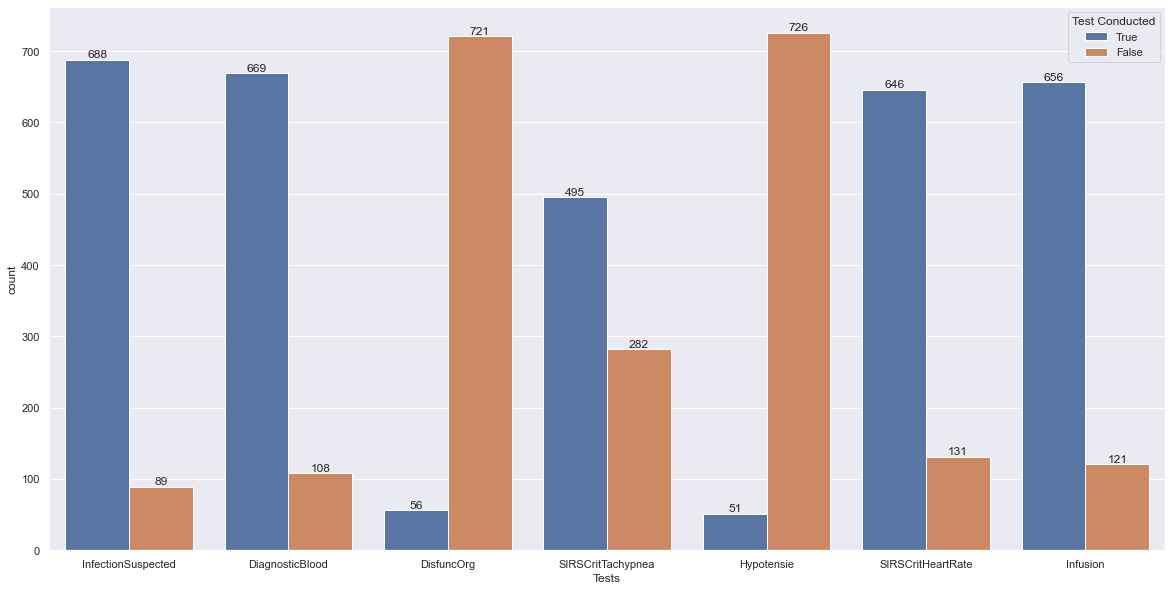

In [7]:
df = sepsis[['InfectionSuspected', 'DiagnosticBlood', 'DisfuncOrg',
       'SIRSCritTachypnea', 'Hypotensie', 'SIRSCritHeartRate', 'Infusion']]
df1 = df.melt(var_name='Tests', value_name='Test Conducted')
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(x='Tests', hue='Test Conducted', data=df1)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

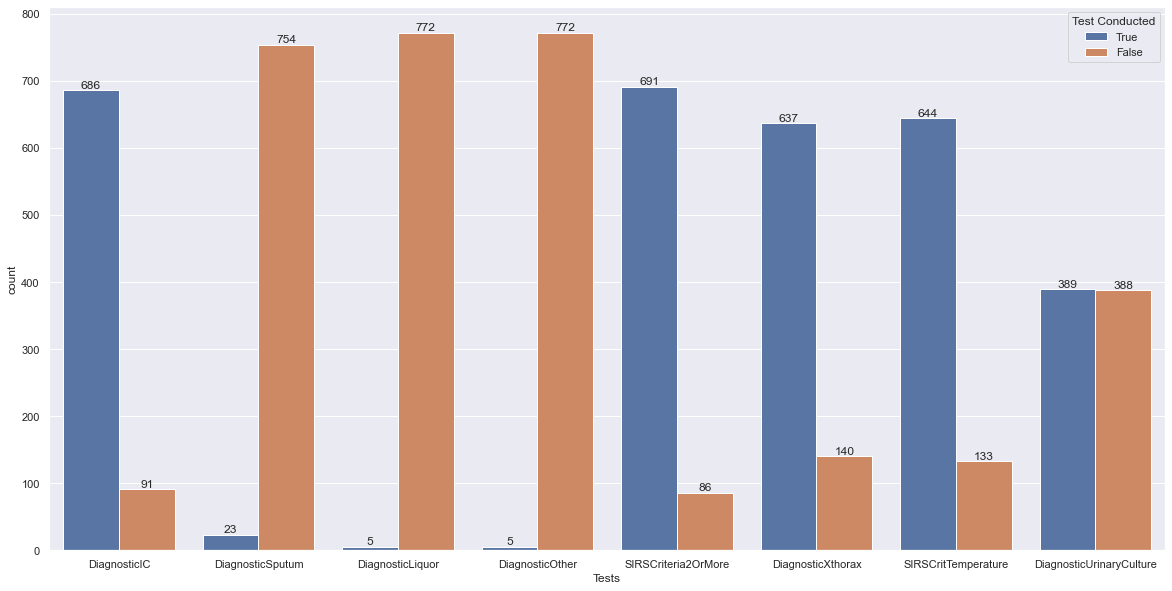

In [8]:
df = sepsis[['DiagnosticIC', 'DiagnosticSputum',
       'DiagnosticLiquor', 'DiagnosticOther', 'SIRSCriteria2OrMore',
       'DiagnosticXthorax', 'SIRSCritTemperature', 'DiagnosticUrinaryCulture']]
df1 = df.melt(var_name='Tests', value_name='Test Conducted')
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(x='Tests', hue='Test Conducted', data=df1)
for container in ax.containers:
    ax.bar_label(container)
plt.show()




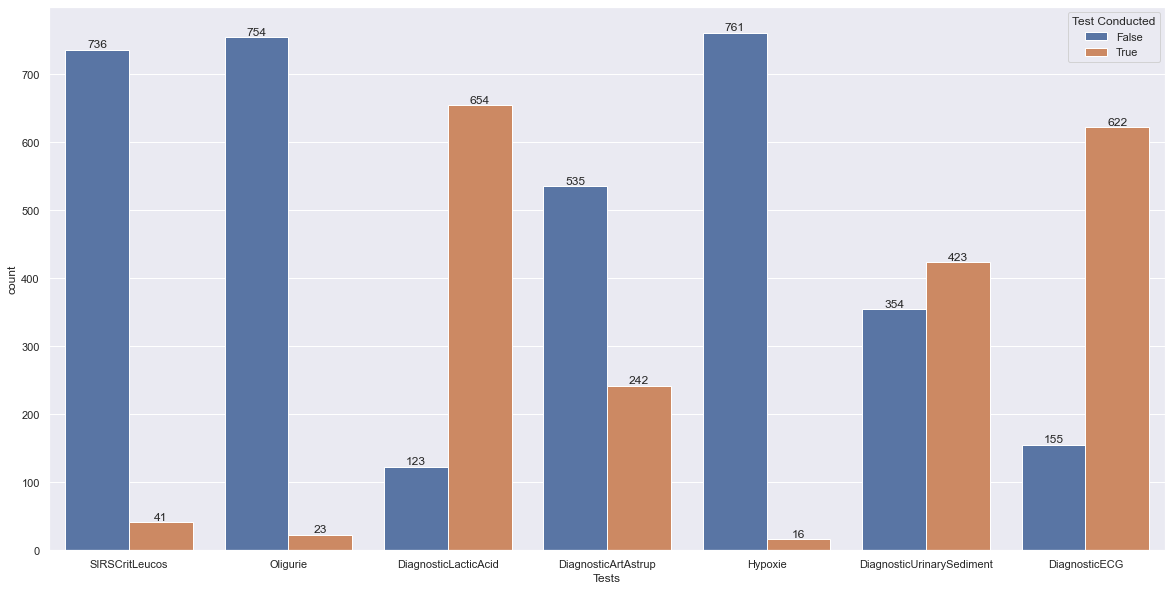

In [9]:
df = sepsis[['SIRSCritLeucos', 'Oligurie', 'DiagnosticLacticAcid','DiagnosticArtAstrup','Hypoxie', 'DiagnosticUrinarySediment', 'DiagnosticECG']]
df1 = df.melt(var_name='Tests', value_name='Test Conducted')
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(x='Tests', hue='Test Conducted', data=df1)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

       

### Getting Release Type of every case

In [10]:
rel = sepsis[['Case ID', 'Activity']]
release = rel[rel['Activity'].str.contains('Release')]

### Counting number of activities

In [11]:
count_events = sepsis[['Case ID','Activity','Leucocytes', 'CRP', 'LacticAcid']]
count_events_and_tests= count_events.groupby('Case ID')[['Activity','Leucocytes', 'CRP', 'LacticAcid']].count()
count_events_and_tests.head()


,Activity,Leucocytes,CRP,LacticAcid
Case ID,,,,
A,22,7,7,1
AAA,11,1,1,1
ABA,17,5,4,1
AC,13,2,2,1
AD,29,7,7,5


In [12]:
count_events_and_tests.shape

(776, 4)

### Dropping non important features.

In [13]:
sepsis = sepsis.drop(['Activity', 'Complete Timestamp', 'Variant', 'Variant index',
    'lifecycle:transition', 'org:group'], axis=1)
sepsis.head(20)

,Case ID,InfectionSuspected,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,Age,...,SIRSCritLeucos,Oligurie,DiagnosticLacticAcid,Diagnose,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG,Leucocytes,CRP,LacticAcid
0,A,True,True,True,True,True,True,True,True,85.0,...,False,False,True,A,False,True,True,NaN,NaN,NaN
1,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.6,NaN,NaN
2,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN
3,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2
4,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.0,NaN


### Dropping rows with NAN values i.e. keeping 1 row for each case

In [14]:
sep=sepsis.dropna(thresh=15)
sep.reset_index(drop=True, inplace=True)
sep.shape

(777, 28)

In [15]:
len(sepsis.Diagnose.unique())

142

In [16]:
count_events_and_tests =count_events_and_tests.reset_index()

In [17]:
# Renaming Column names of dataframe of Counts
count_events_and_tests.rename(columns={'Activity': 'Activity_count', 'Leucocytes': 'Leucocytes_count','CRP':'CRP_count','LacticAcid':'LacticAcid_count'}, inplace=True)
release.rename(columns={'Activity': 'Release_type'}, inplace=True)

/var/folders/dk/9q84mn0j1nzfg85t9zx5d1480000gn/T/ipykernel_14093/2562670835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  release.rename(columns={'Activity': 'Release_type'}, inplace=True)


### Dropping Tests from sepsis dataset

In [18]:
sep = sep.drop(['Leucocytes', 'CRP', 'LacticAcid'], axis=1)
sep.head()

,Case ID,InfectionSuspected,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,Age,...,DiagnosticXthorax,SIRSCritTemperature,DiagnosticUrinaryCulture,SIRSCritLeucos,Oligurie,DiagnosticLacticAcid,Diagnose,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG
0,A,True,True,True,True,True,True,True,True,85.0,...,True,True,True,False,False,True,A,False,True,True
1,B,True,True,False,True,False,True,True,False,45.0,...,True,True,True,False,False,True,B,False,True,True
2,C,True,True,False,False,False,True,True,True,55.0,...,False,True,True,False,False,True,C,False,True,True
3,D,True,True,False,True,False,True,True,True,70.0,...,True,True,False,False,False,True,D,False,False,True
4,F,True,True,False,False,False,True,True,False,50.0,...,True,True,False,False,False,True,E,False,False,True


### Merging All dataframes to constitute table with additional columns i.e. Count of activities and Tests conducted

In [19]:
mer =pd.merge(count_events_and_tests, release, on='Case ID', how='outer')
mer.shape

(777, 6)

In [20]:
processed_data = pd.merge(sep, mer, on='Case ID', how='outer')
processed_data.head(10)

,Case ID,InfectionSuspected,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,Age,...,DiagnosticLacticAcid,Diagnose,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG,Activity_count,Leucocytes_count,CRP_count,LacticAcid_count,Release_type
0,A,True,True,True,True,True,True,True,True,85.0,...,True,A,False,True,True,22.0,7.0,7.0,1.0,Release A
1,B,True,True,False,True,False,True,True,False,45.0,...,True,B,False,True,True,12.0,1.0,3.0,1.0,Release A
2,C,True,True,False,False,False,True,True,True,55.0,...,True,C,False,True,True,14.0,3.0,3.0,0.0,Release A
3,D,True,True,False,True,False,True,True,True,70.0,...,True,D,False,False,True,13.0,2.0,2.0,1.0,Release A
4,F,True,True,False,False,False,True,True,False,50.0,...,True,E,False,False,True,10.0,1.0,1.0,1.0,Release A
5,G,True,True,False,False,False,True,True,False,60.0,...,True,F,False,True,True,12.0,2.0,2.0,1.0,Release A
6,H,False,False,False,True,False,True,False,False,80.0,...,False,G,False,False,False,13.0,2.0,3.0,1.0,Release B
7,I,True,True,False,False,False,True,False,True,80.0,...,True,H,False,True,True,11.0,2.0,2.0,1.0,Release A
8,J,True,True,False,True,False,True,True,False,80.0,...,True,B,False,True,True,11.0,1.0,2.0,1.0,Release A
9,K,True,True,False,True,False,True,True,False,50.0,...,True,I,False,True,True,16.0,3.0,3.0,1.0,Release A


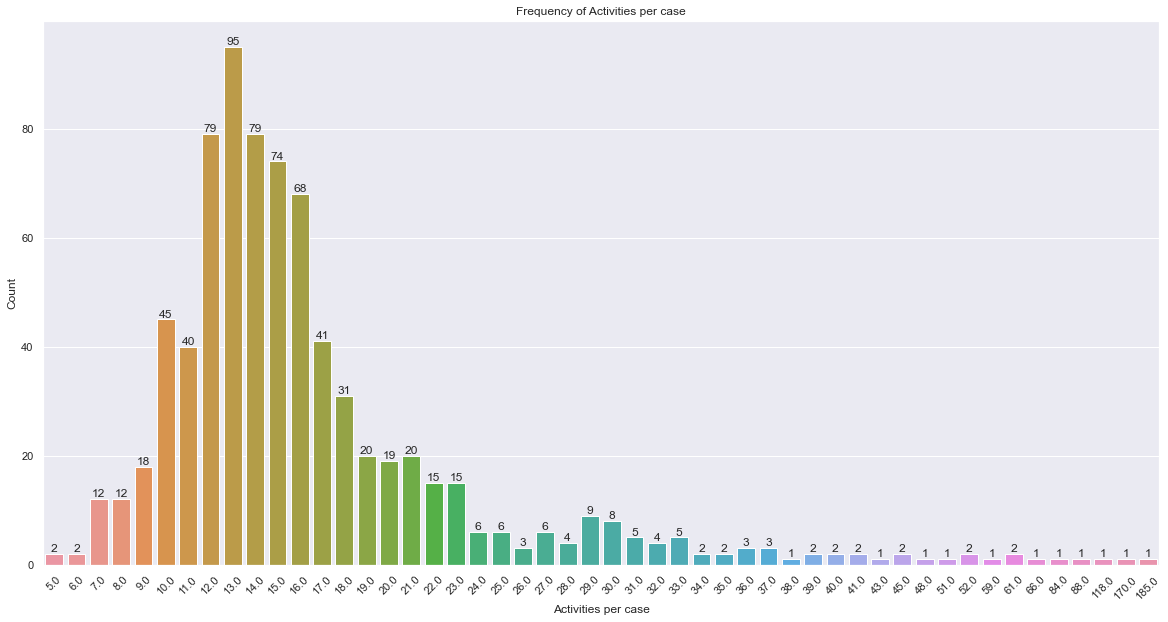

In [23]:

sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(x=processed_data["Activity_count"])
for container in ax.containers:
    ax.bar_label(container)
ax.set(xlabel='Activities per case', ylabel='Count',title='Frequency of Activities per case')

plt.xticks(rotation=45)
plt.show()

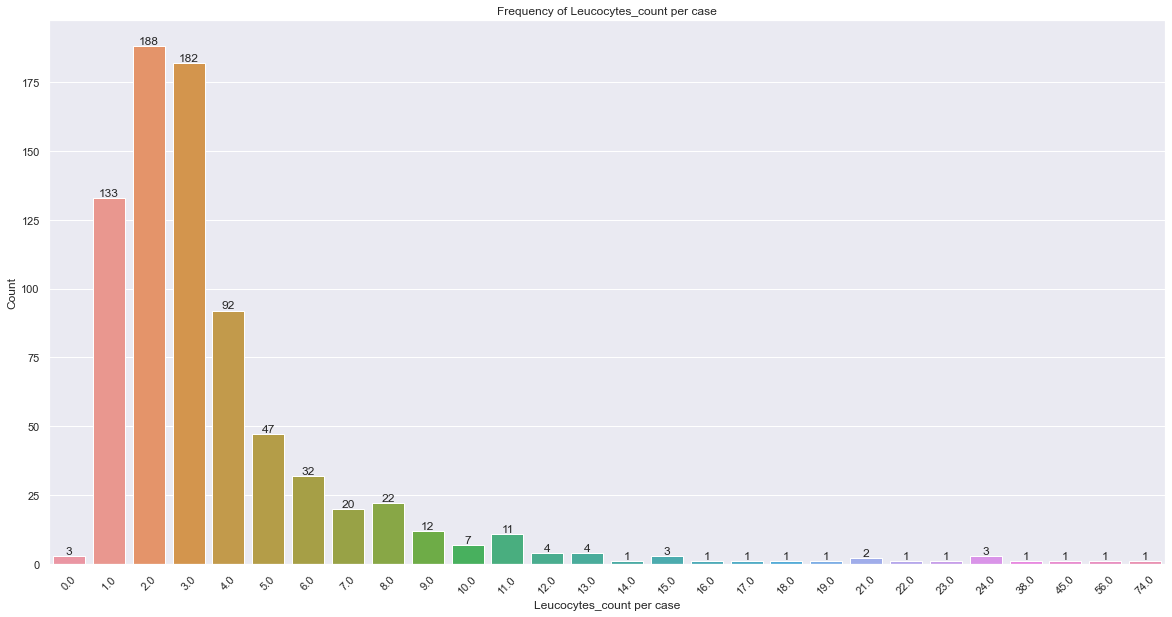

In [24]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(x=processed_data["Leucocytes_count"])
for container in ax.containers:
    ax.bar_label(container)
ax.set(xlabel='Leucocytes_count per case', ylabel='Count',title='Frequency of Leucocytes_count per case')
plt.xticks(rotation=45)
plt.show()

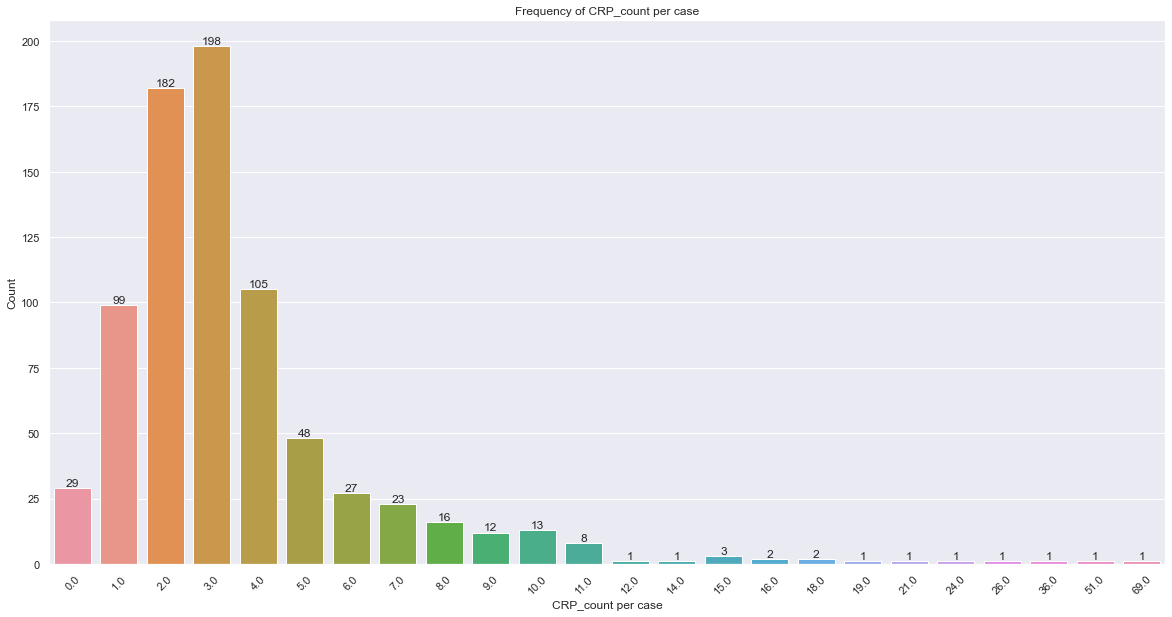

In [25]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(x=processed_data["CRP_count"])
for container in ax.containers:
    ax.bar_label(container)
ax.set(xlabel='CRP_count per case', ylabel='Count',title='Frequency of CRP_count per case')

plt.xticks(rotation=45)
plt.show()

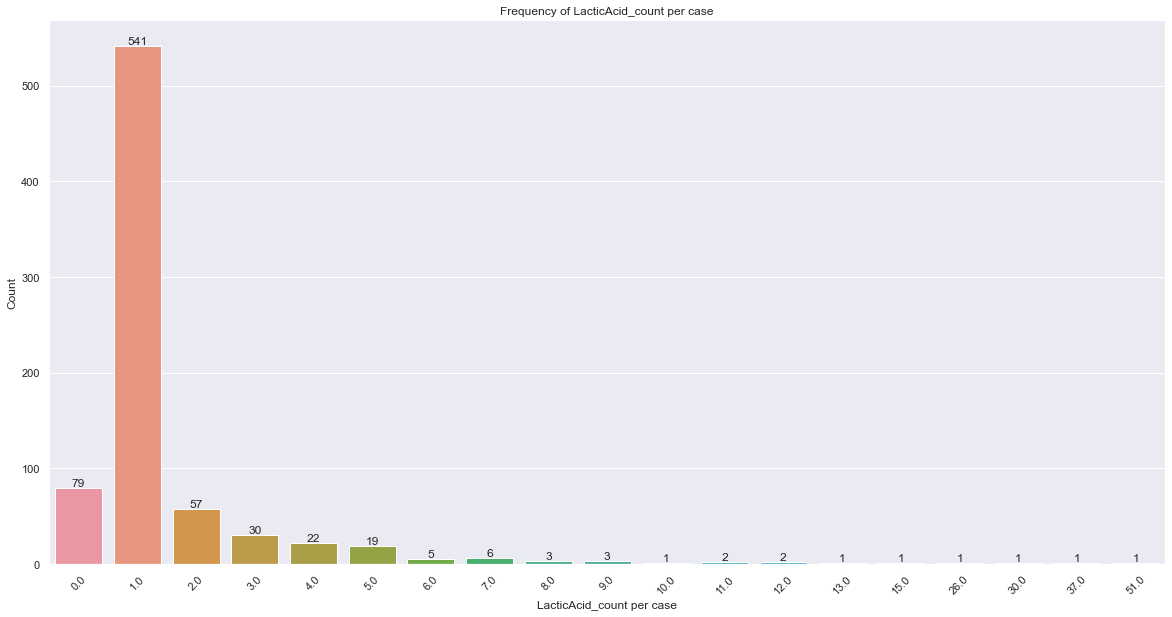

In [26]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(x=processed_data["LacticAcid_count"])
for container in ax.containers:
    ax.bar_label(container)
ax.set(xlabel='LacticAcid_count per case', ylabel='Count',title='Frequency of LacticAcid_count per case')

plt.xticks(rotation=45)
plt.show()

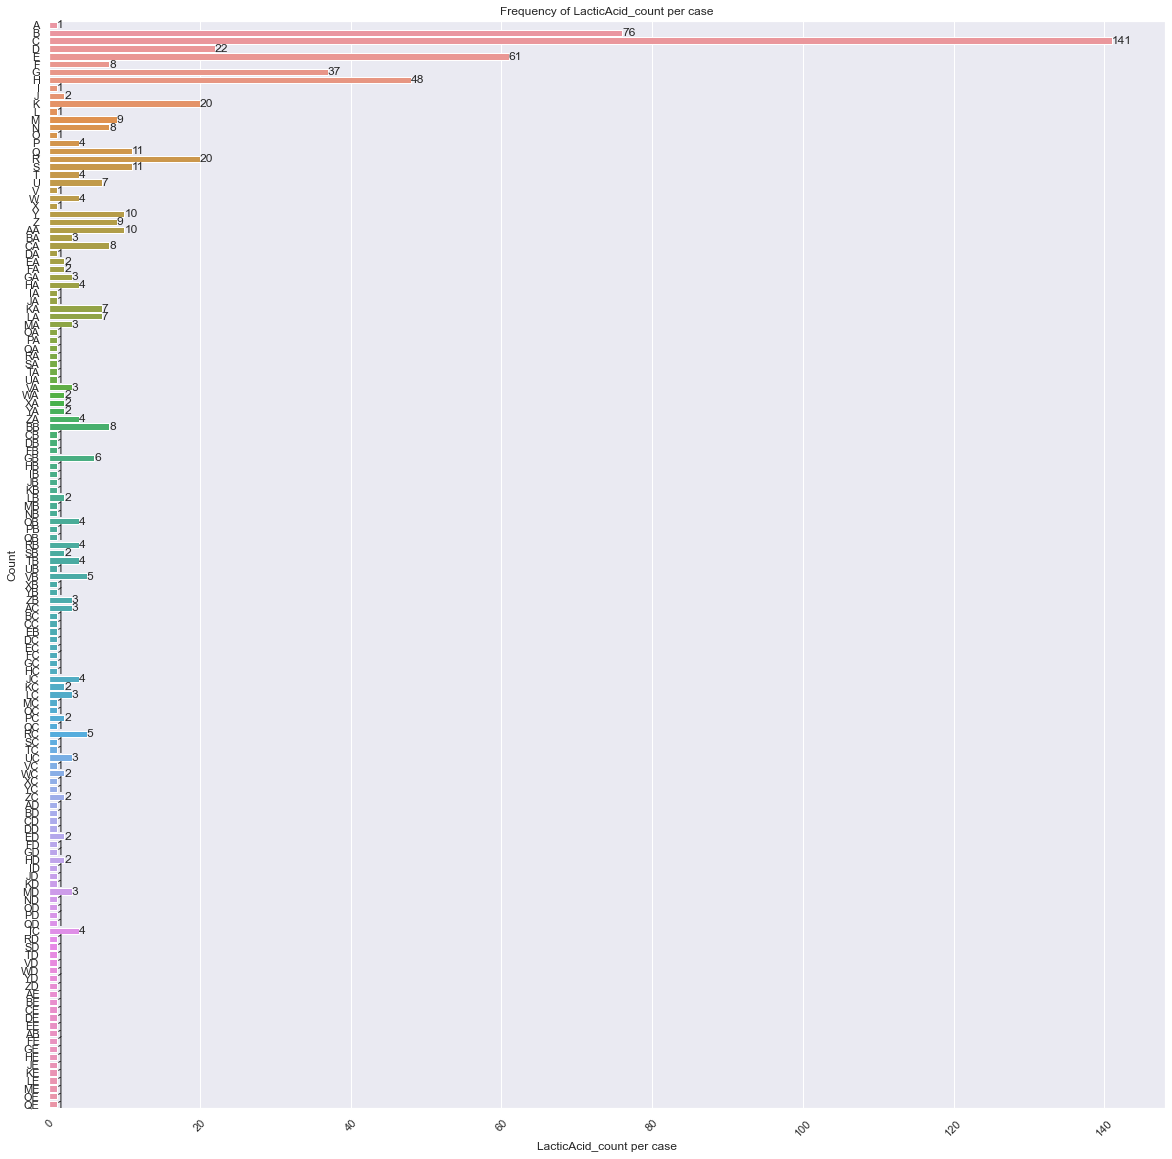

In [56]:
sns.set(rc={'figure.figsize':(20,20)})
ax = sns.countplot(y=processed_data["Diagnose"])
for container in ax.containers:
    ax.bar_label(container)
ax.set(xlabel='LacticAcid_count per case', ylabel='Count',title='Frequency of LacticAcid_count per case')

plt.xticks(rotation=45)
plt.show()


In [ ]:
processed_data.shape

(777, 31)

### Data Cleaning

In [31]:
processed_data.columns[processed_data.isna().any()].tolist()

['Case ID',
 'Age',
 'Diagnose',
 'Activity_count',
 'Leucocytes_count',
 'CRP_count',
 'LacticAcid_count']

In [32]:
processed_data[['Case ID',
 'Age',
 'Diagnose',
 'Activity_count',
 'Leucocytes_count',
 'CRP_count',
 'LacticAcid_count']].isna().sum()

Case ID              1
Age                 43
Diagnose            47
Activity_count       1
Leucocytes_count     1
CRP_count            1
LacticAcid_count     1
dtype: int64

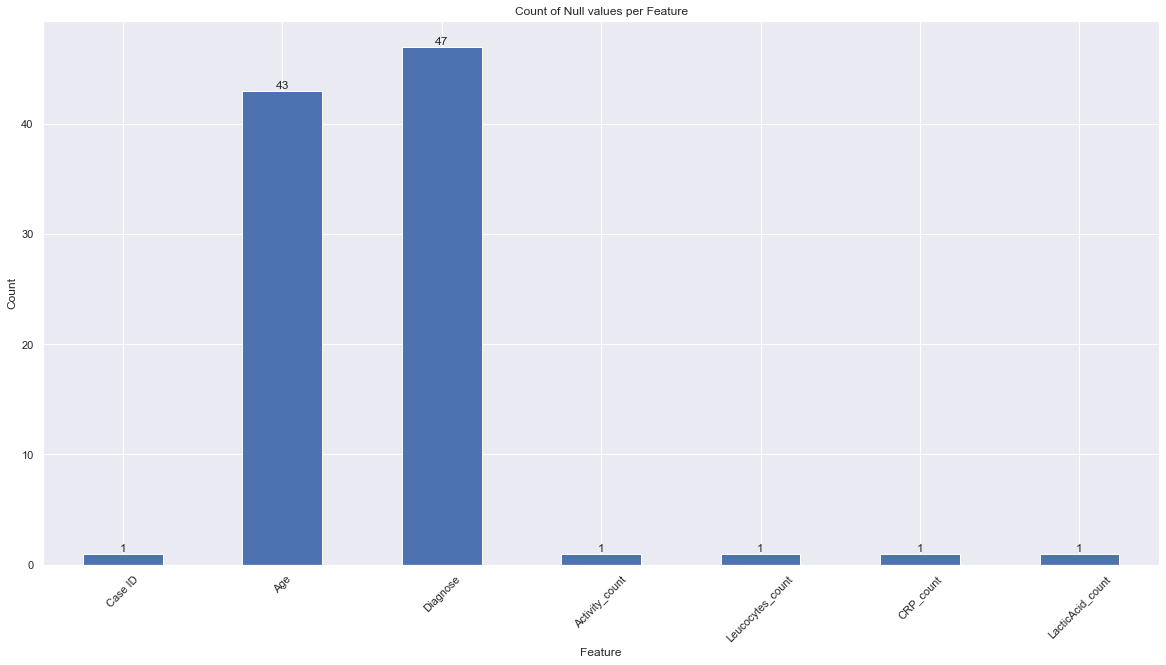

In [45]:
ax = processed_data[['Case ID',
 'Age',
 'Diagnose',
 'Activity_count',
 'Leucocytes_count',
 'CRP_count',
 'LacticAcid_count']].isna().sum().plot.bar()
plt.title('Null values')

ax.set(xlabel='Feature', ylabel='Count',title='Count of Null values per Feature')
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45)
plt.show()

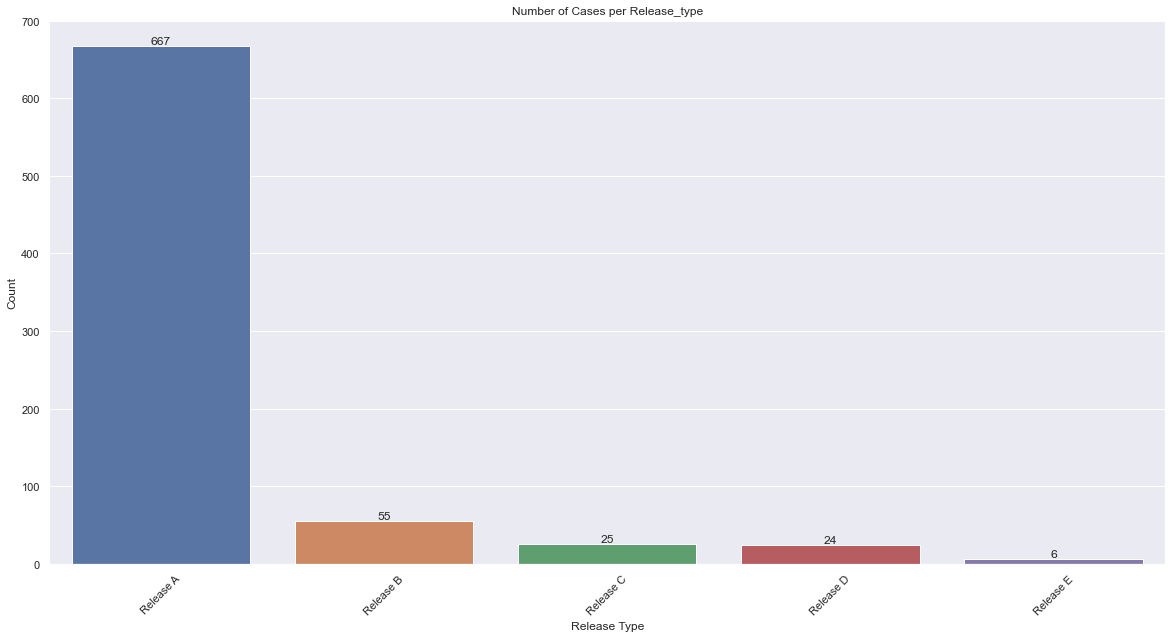

In [54]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(x=processed_data["Release_type"])
for container in ax.containers:
    ax.bar_label(container)
ax.set(xlabel='Release Type', ylabel='Count',title='Number of Cases per Release_type')

plt.xticks(rotation=45)
plt.show()

### Reading Processed Cleaned Data

In [46]:
df = pd.read_csv('Datasets/Processed_cleaned_data.csv')
df.head()

,Unnamed: 0,Case ID,InfectionSuspected,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,...,DiagnosticLacticAcid,Diagnose,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG,Activity_count,Leucocytes_count,CRP_count,LacticAcid_count,Release_type
0,0,A,1,1,1,1,1,1,1,1,...,1,0,0,1,1,22.0,7.0,7.0,1.0,0
1,1,B,1,1,0,1,0,1,1,0,...,1,1,0,1,1,12.0,1.0,3.0,1.0,0
2,2,C,1,1,0,0,0,1,1,1,...,1,2,0,1,1,14.0,3.0,3.0,0.0,0
3,3,D,1,1,0,1,0,1,1,1,...,1,3,0,0,1,13.0,2.0,2.0,1.0,0
4,4,F,1,1,0,0,0,1,1,0,...,1,4,0,0,1,10.0,1.0,1.0,1.0,0


In [47]:
df.shape

(729, 31)